In [2]:
## Women sports topics (Most played sports, maybe add age??):
#Athletics, Gymnastics, Swimming

import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np 
import pandas as pd
pd.get_option("display.max_columns")

20

In [3]:
# The path to our CSV file
file = "Resources/original_olympic_data.csv"

# Read our data into pandas
df = pd.read_csv(file)
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [5]:
## All Females in all countries 

#Selecting the columns
starter_olympics_df = df.loc[:, ['Name', 'Sex', 'Age', 'Team', 'NOC',
                                'Year', 'Sport', 'Event', 'Medal', "ID"]]
starter_olympics_df.head()

#Select only Females
usa_filter_f = starter_olympics_df[(starter_olympics_df["Sex"] == "F")]
usa_filter_f.head()

#drop duplicates based off of the name
usa_clean = usa_filter_f.drop_duplicates(subset=['Name']).count()
usa_clean.head()

#Checking for any Nan values on columns to be used
#usa_clean['NOC'].isnull().values.any()

Name    33808
Sex     33808
Age     33525
Team    33808
NOC     33808
dtype: int64

In [6]:
## All Males in all countries 
#Selecting the columns
starter_olympics_df = df.loc[:, ['Name', 'Sex', 'Age', 'Team', 'NOC',
                                'Year', 'Sport', 'Event', 'Medal']]
starter_olympics_df.head()

#Select only Males
usa_filter = starter_olympics_df[(starter_olympics_df["Sex"] == "M")]
usa_filter.head()

#drop duplicates based off of the name
usa_clean = usa_filter.drop_duplicates(subset=['Name']).count()
usa_clean.head()

#Checking for any Nan values on columns to be used
#usa_clean['NOC'].isnull().values.any()

Name    100979
Sex     100979
Age      94941
Team    100979
NOC     100979
dtype: int64

In [7]:
player_data = usa_filter_f[["Sex", "Age", "Sport", "Year", "ID"]]
player_data= player_data.drop_duplicates()
player_data

,Sex,Age,Sport,Year,ID
4,F,21.0,Speed Skating,1988,5
6,F,25.0,Speed Skating,1992,5
8,F,27.0,Speed Skating,1994,5
26,F,18.0,Athletics,1932,8
32,F,30.0,Sailing,1996,13
...,...,...,...,...,...
271080,F,33.0,Athletics,1964,135553
271099,F,36.0,Wrestling,2004,135560
271102,F,19.0,Athletics,2000,135563
271103,F,23.0,Athletics,2004,135563


In [14]:
labels = player_data['Year'].drop_duplicates()
print(labels.tolist())

[1988, 1992, 1994, 1932, 1996, 2000, 2008, 2016, 1984, 2004, 2012, 1980, 2014, 1900, 1972, 1960, 1948, 1998, 2002, 1956, 1952, 1976, 1964, 2006, 2010, 1924, 1968, 1936, 1928, 1912, 1908, 1920, 1904, 1906]


In [38]:

#Select specific sports to look at trend
selected_sport1 = player_data.loc[(player_data['Sport'] == 'Athletics'), :]

selected_sport2 = player_data.loc[(player_data['Sport'] == 'Gymnastics'), :]

selected_sport3 = player_data.loc[(player_data['Sport'] == 'Swimming'), :]

#participants = [(len(selected_sport1)),(len(selected_sport2)),(len(selected_sport3))]
#print(selected_sport1)   

grp_ss1 = selected_sport1.groupby(by="Year").count()
df_yr1 = pd.DataFrame(grp_ss1)
df_yr1

,Sex,Age,Sport,ID
Year,,,,
1928,95,86,95,95
1932,54,54,54,54
1936,98,98,98,98
1948,144,139,144,144
1952,187,185,187,187
1956,147,143,147,147
1960,204,204,204,204
1964,236,236,236,236
1968,243,243,243,243


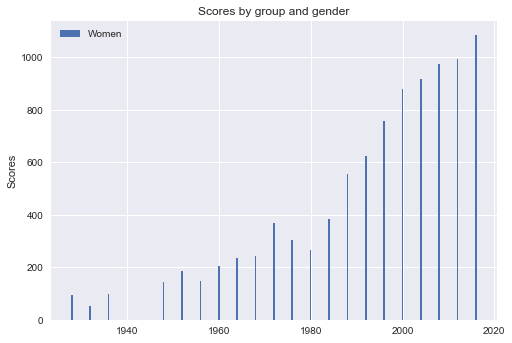

In [40]:
labels = df_yr1.index
women_count = df_yr1['ID']


width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

# ax.bar(labels, men_means, width, yerr=men_std, label='Men')
ax.bar(labels, women_count, width,
       label='Women')

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.legend()

plt.show()